In [4]:
# Load up granular log file, calculate mean and variance for each
import numpy as np

def meanvar(filename):
    bbox = []
    segm = []
    with open(filename) as f:
        content = f.readlines()
#     print(content[:4])
    for l in content:
        if l.startswith('bbox AP50'):
            bbox.append(l)
        if l.startswith('segm AP50'):
            segm.append(l)
#     print(bbox, segm)
    bbox = np.asarray([float(x.strip()[len('bbox AP50 '):]) for x in bbox])
    segm = np.asarray([float(x.strip()[len('segm AP50 '):]) for x in segm])
    print(f' samples {len(bbox)}') #, bbox[:2], len(segm), segm[:2])
#     print(f'bbox mean {bbox.mean()}, std {bbox.std()}')
#     print(f'segm mean {segm.mean()}, std {segm.std()}')
    return [bbox.mean(), bbox.std(), segm.mean(), segm.std()]


In [8]:
#list dir for all the log files 
import glob
import matplotlib.pyplot as plt

def getkey_gtfix(f):
    gt = f[f.find('gt10')+5:f.find('gt10')+6]
    print(f'gt {gt}')
    return int(gt)

def getkey_pfix(f):
    gt = f[f.find('gt')+2:f.find('gt')+4]
    print(f'gt {gt}')
    if gt == '5p':
        return 5
    return int(gt)

def main(logdir, key_fn):
    data = {}
    fs = glob.glob(logdir + '/*')
    for f in fs:
        print(f'file {f}')
        print(key_fn(f))
        print(f[len(logdir)+1:])
        data[key_fn(f)] = meanvar(f)
    bm = {}
    sm = {}
    bmerr = {}
    smerr = {}
    for k, v in data.items():
        bm[k] = v[0]
        sm[k] = v[2]
        bmerr[k] = v[1]
        smerr[k] = v[3]
    bm = {k: v for k, v in sorted(bm.items())}
    bmerr = {k: v for k, v in sorted(bmerr.items())}
    sm = {k: v for k, v in sorted(sm.items())}
    smerr = {k: v for k, v in sorted(smerr.items())}
#     print(f'bm {bm}\nbmerr {bmerr} \nsm {sm} \nsmerr {smerr}')
#     plt.plot(bm.keys(), bm.values())
#     plt.show()
#     plt.plot(sm.keys(), sm.values())
#     plt.show()
#     print(bm)
    return bm, bmerr, sm, smerr

def compare(log_act, log_def, key_fn, fixed_label, x_label):
    bm_act, bmerr_act, sm_act, smerr_act = main(log_act, key_fn)
    bm_def, bmerr_def, sm_def, smerr_def = main(log_def, key_fn)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3), dpi=100)
    ax1.set_title(f'bbox AP50, {fixed_label}')
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('AP50')
    ax1.errorbar(bm_act.keys(), bm_act.values(), yerr=bmerr_act.values(), label='active')
    ax1.errorbar(bm_def.keys(), bm_def.values(), yerr=bmerr_def.values(), label='baseline')
    ax1.legend(loc="upper left")

#     plt.show()
    
    ax2.set_title(f'segm AP50, {fixed_label}')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel('AP50')
    ax2.errorbar(sm_act.keys(), sm_act.values(), yerr=smerr_act.values(), label='active')
    ax2.errorbar(sm_def.keys(), sm_def.values(), yerr=smerr_def.values(), label='baseline')
    ax2.legend(loc="upper left")

    plt.show()

file /checkpoint/apratik/finals/logs/active1k_final/straightline_apt0_gt20p2fix_corlnn_granular.txt
gt 20
20
straightline_apt0_gt20p2fix_corlnn_granular.txt
 samples 1317
gt 20
file /checkpoint/apratik/finals/logs/active1k_final/straightline_apt0_gt15p2fix_corlnn_granular.txt
gt 15
15
straightline_apt0_gt15p2fix_corlnn_granular.txt
 samples 656
gt 15
file /checkpoint/apratik/finals/logs/active1k_final/straightline_apt0_gt25p2fix_corlnn_granular.txt
gt 25
25
straightline_apt0_gt25p2fix_corlnn_granular.txt
 samples 768
gt 25
file /checkpoint/apratik/finals/logs/active1k_final/straightline_apt0_gt5p2fix_corlnn_granular.txt
gt 5p
5
straightline_apt0_gt5p2fix_corlnn_granular.txt
 samples 735
gt 5p
file /checkpoint/apratik/finals/logs/active1k_final/straightline_apt0_gt10p2fix_corlnn_granular.txt
gt 10
10
straightline_apt0_gt10p2fix_corlnn_granular.txt
 samples 695
gt 10
file /checkpoint/apratik/finals/logs/default1k_final_v2/default_apt0_gt15p2fix_corlnn_granular.txt
gt 15
15
default_apt0_g

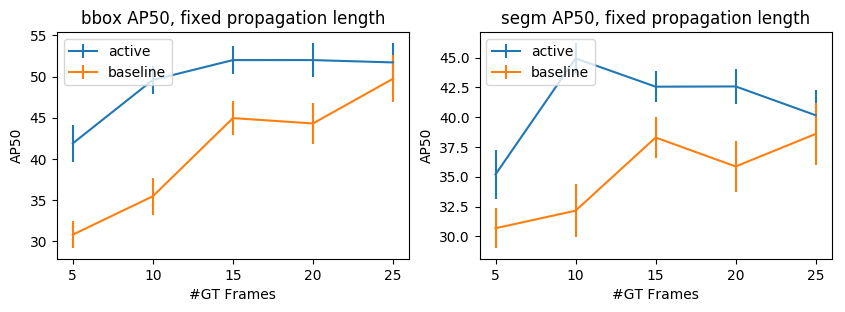

In [11]:
compare(
    '/checkpoint/apratik/finals/logs/active1k_final', 
    '/checkpoint/apratik/finals/logs/default1k_final_v2',
    getkey_pfix,
    'fixed propagation length',
    '#GT Frames',
)

file /checkpoint/apratik/finals/logs/active1k_gtfix_final/straightline_apt0_gt10p6_h1nn_granular.txt
gt 6
6
straightline_apt0_gt10p6_h1nn_granular.txt
 samples 912
gt 6
file /checkpoint/apratik/finals/logs/active1k_gtfix_final/straightline_apt0_gt10p2_h1nn_granular.txt
gt 2
2
straightline_apt0_gt10p2_h1nn_granular.txt
 samples 946
gt 2
file /checkpoint/apratik/finals/logs/active1k_gtfix_final/straightline_apt0_gt10p4_h1nn_granular.txt
gt 4
4
straightline_apt0_gt10p4_h1nn_granular.txt
 samples 573
gt 4
file /checkpoint/apratik/finals/logs/active1k_gtfix_final/straightline_apt0_gt10p8_h1nn_granular.txt
gt 8
8
straightline_apt0_gt10p8_h1nn_granular.txt
 samples 669
gt 8
file /checkpoint/apratik/finals/logs/default1k_gtfix_final/default_apt0_gt10p4_h1nn_granular.txt
gt 4
4
default_apt0_gt10p4_h1nn_granular.txt
 samples 1893
gt 4
file /checkpoint/apratik/finals/logs/default1k_gtfix_final/default_apt0_gt10p6_h1nn_granular.txt
gt 6
6
default_apt0_gt10p6_h1nn_granular.txt
 samples 1329
gt 6
fi

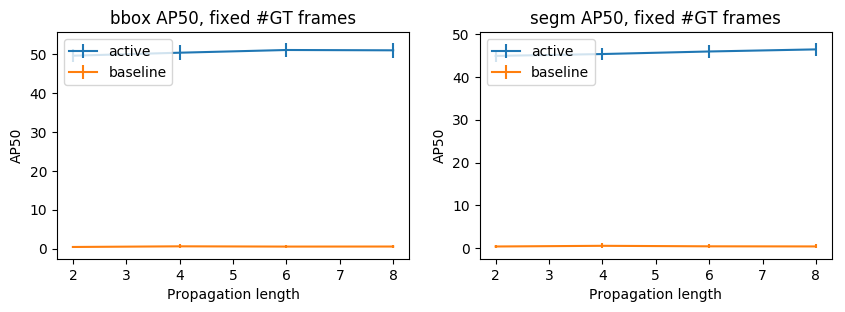

In [10]:
compare(
    '/checkpoint/apratik/finals/logs/active1k_gtfix_final', 
    '/checkpoint/apratik/finals/logs/default1k_gtfix_final',
    getkey_gtfix,
    'fixed #GT frames',
    'Propagation length'
)